## **Bike Sharing Case Study**

## **Problem Statement:**

To build a multiple linear regression model for the prediction of demand for shared bikes. 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. This bike can then be returned to another dock belonging to the same system. 

The company wants to know:

*   Which variables are significant in predicting the demand for shared bikes.
*   How well those variables describe the bike demands.



**1: Reading and Understanding the Data**

In [1]:
# Surpass warnings and import necessary libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read the dataset and check the head of the dataset

df = pd.read_csv("/content/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the shape of the dataframe

df.shape

(730, 16)

In [4]:
# Check the dataframe for null values and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Describe the dataframe and check details of numerical data.

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**2: Data Cleaning**

In [6]:
# Drop the unnecessary variables.

df.drop(['instant','dteday','atemp','casual','registered'], axis = 1, inplace = True)

**Inference**:

1. Droping instant column as it is index column which has nothing to do with target variable.
2. Dropping dteday as we have already have month and weekday columns.
3. Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column.
4. One variable Temperature ‘temp’ tells about the other variable which is ‘feel-like’ temperature ‘atemp’. Therefore, one of these variables can be dropped.



In [7]:
# Identify the categorical variables and make the necessary changes as per data dictionary.

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [8]:
df.mnth = df.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})


In [9]:
df.weekday = df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [10]:
df.weathersit = df.weathersit.map({1:'clear', 2:'misty', 3:'light_snowrain', 4:'heavy_snowrain'})

In [11]:
# Check the data after doing necessary changes.

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [12]:
# Check the info after dropping unnecessary variables.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


**3: Exploratory Data Analysis**

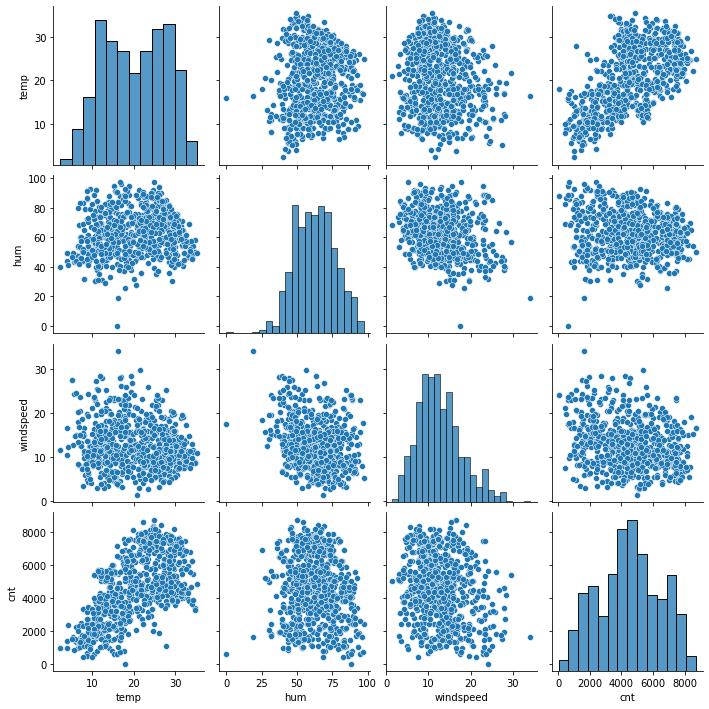

In [13]:
# Numerical variables analysis.
# Draw pairplots for continuous numeric variables using seaborn.

sns.pairplot(data=df, vars=['temp','hum','windspeed','cnt'])
plt.show()

**Inference:**

*   Temp is highly corelated with the target variable cnt.  



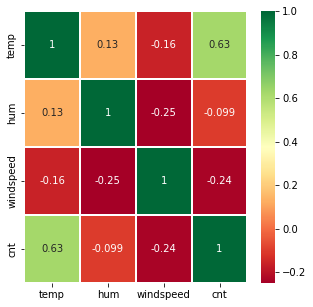

In [14]:
# Checking correlation of the parameters by mapping a correlation heatmap.
df_num = df[['temp','hum','windspeed','cnt']]

plt.figure(figsize = (5,5))
ax= sns.heatmap(df_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

**Inference:**
In heatmap also temperature is highly correlated with cnt, as we have seen in pairplot.

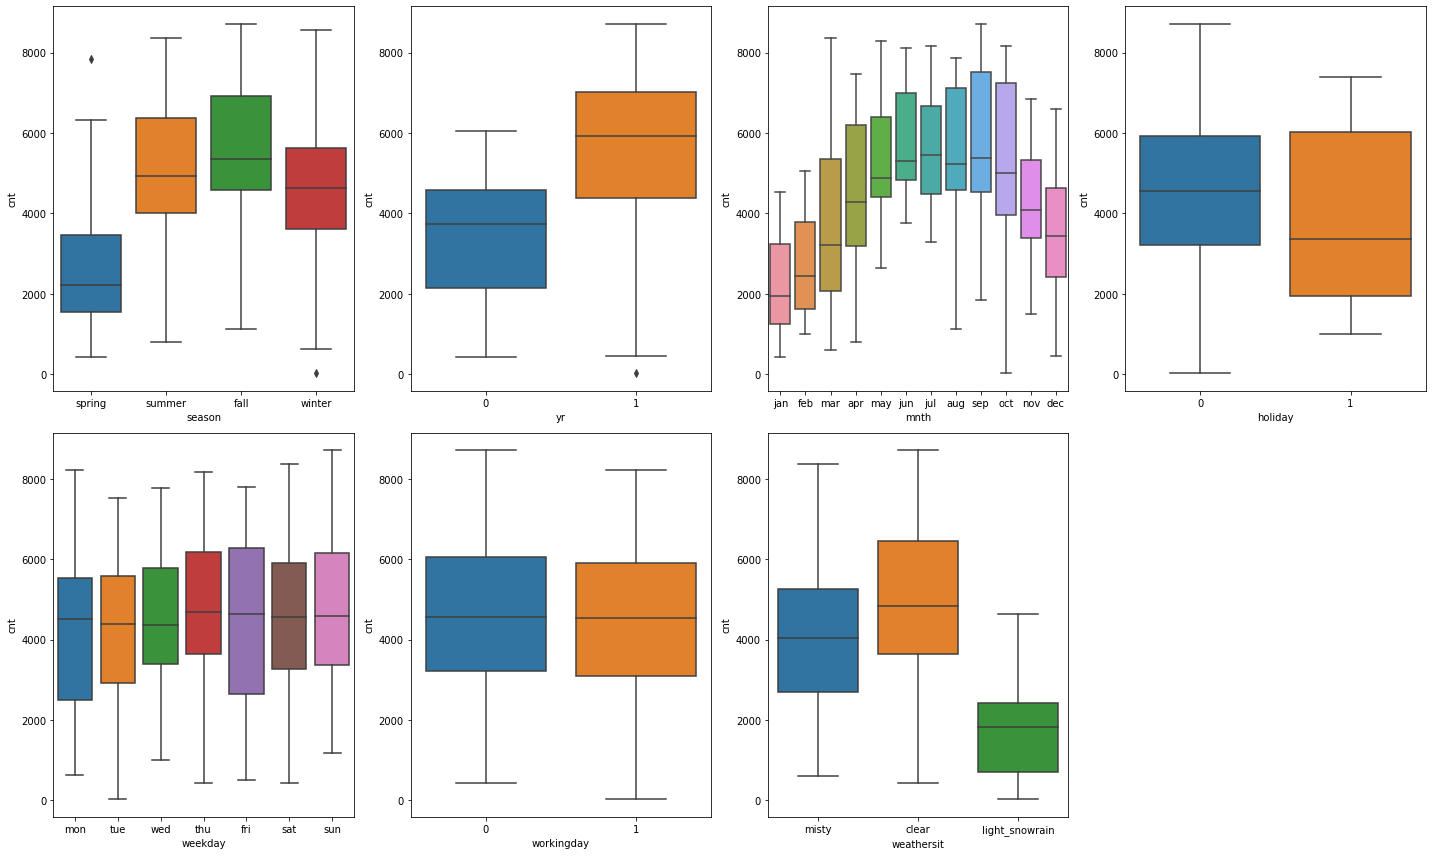

In [16]:
# Built a boxplot of all categorical variables against the target variable 'cnt' 
# To see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.tight_layout()
plt.show()

**Inference:**
1. Fall season has highest demand for rental bikes.
2. Demand for 2019 year has grown.
3. Demand is continuously growing each month till June. September month has highest demand and after September demand is decreasing.
4. When there is a holiday, demand has decreased.
5. Weekday and workingday plot not showing much difference of demand.
6. The clear weathersit has highest demand.

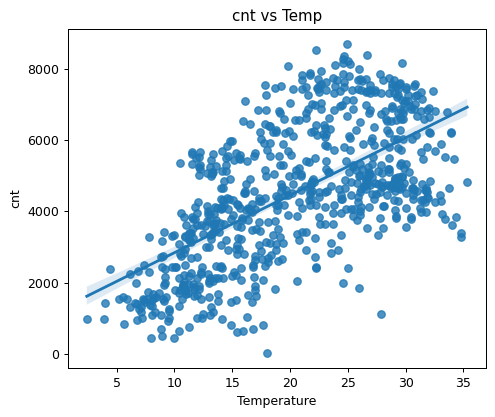

In [17]:
# Let's check the analysis of target variable with temp, hum and windspeed respectively.

plt.figure(figsize=(6,5),dpi=90)
plt.title("cnt vs Temp",fontsize=12)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

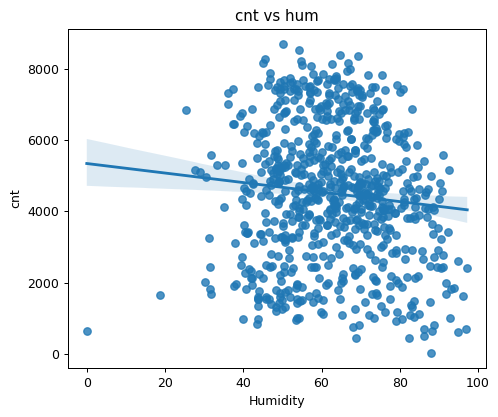

In [18]:
plt.figure(figsize=(6,5),dpi=90)
plt.title("cnt vs hum",fontsize=12)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

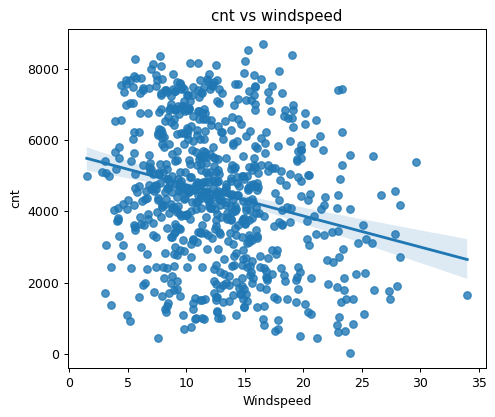

In [19]:
plt.figure(figsize=(6,5),dpi=90)
plt.title("cnt vs windspeed",fontsize=12)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

**Inference:**


1.   Demand for bikes is positively correlated to temp. Cnt is linearly increasing with temp indicating linear relation.
2.   Hum values are more scattered around. Demand decreasing with increase in humidity.
3. Windspeed values are also scattered around and demand decreasing with increase in windspeed.



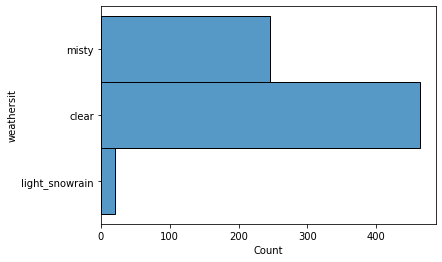

In [20]:
# Let's plot the histogram of weathersit, holiday and weekday.

sns.histplot(data=df, y="weathersit")
plt.show()

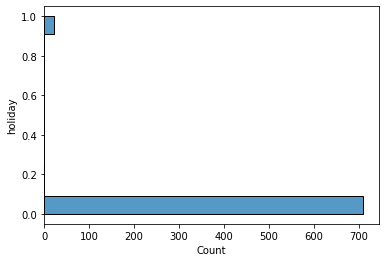

In [21]:
sns.histplot(data=df, y="holiday")
plt.show()

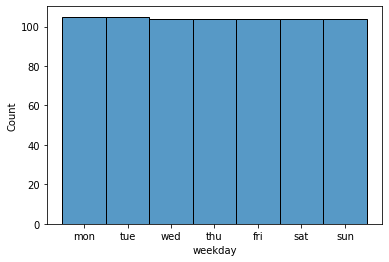

In [22]:
sns.histplot(data=df, x="weekday")
plt.show()

**Inference:**

* Demand is less on holidays. (1:Holiday and 0:Non-holiday)
* Demands are high in clear weather followed by misty weather.
* Booking seems to be almost equal on all working days.

**4: Data Preparation**

In [23]:
# Get the dummy variables for 'season','month','weekday','weathersit'.

season_df = pd.get_dummies(df.season,drop_first=True)
month_df = pd.get_dummies(df.mnth,drop_first=True)
weekday_df = pd.get_dummies(df.weekday,drop_first=True)
weathersit_df = pd.get_dummies(df.weathersit,drop_first=True)


In [24]:
# Merge the dataframe with the dummy variables.

df_new = pd.concat([df, season_df, month_df, weekday_df, weathersit_df], axis=1)


In [25]:
# Let's drop unnecessary columns as we have created dummy variables.

df_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [26]:
# Let's check the head of new dataframe.

df_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Check the info and shape of new dataframe.

df_new.shape

(730, 29)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   spring          730 non-null    uint8  
 8   summer          730 non-null    uint8  
 9   winter          730 non-null    uint8  
 10  aug             730 non-null    uint8  
 11  dec             730 non-null    uint8  
 12  feb             730 non-null    uint8  
 13  jan             730 non-null    uint8  
 14  jul             730 non-null    uint8  
 15  jun             730 non-null    uint8  
 16  mar             730 non-null    uint8  
 17  may             730 non-null    uin

**5: Split the Data into Training and Testing Sets**

In [29]:
# Import necesaary libraries.

from sklearn.model_selection import train_test_split

In [30]:
# Split the data into Train and Test set.

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

**6: Rescaling**

In [31]:
# Will use MinMax scaling. Hence, import necessary libraries for rescaling.

from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

# Apply scaler to all numerical variable columns.

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


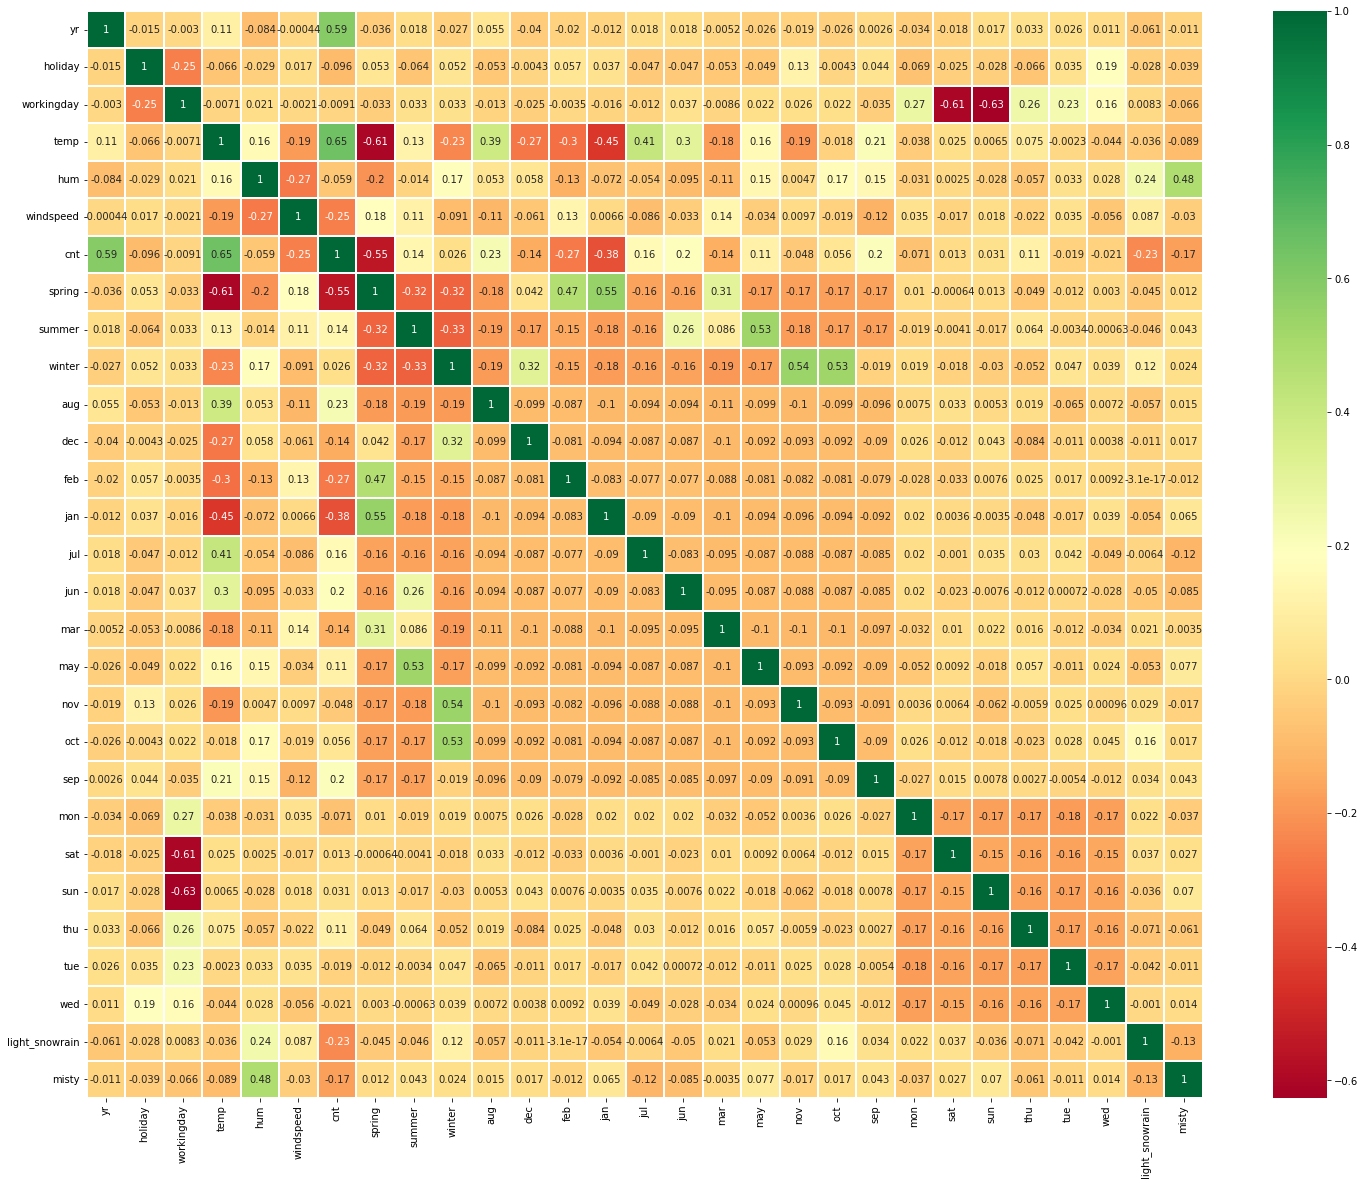

In [34]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = (25,20))
ax= sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

**Inference:**

1. There is multi-colinearity between the variables. We need to consider the factors while developing the model.
2. Workingday variable has high negative correlation with Sat & Sun.
3. Spring is negatively correlated with cnt.
4. Temp and yr has strong correlation with cnt.
5. Misty weather and humidity has correlation.
6. Spring weather with Jan & Feb, summer weather with May and winter weather with Nov & Oct has correlation.

**7: Building a Linear Model**

In [35]:
# Dividing into X and Y sets for the model building.

y_train = df_train.pop('cnt')
X_train = df_train

In [36]:
# Recursive feature elimination (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15.

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('light_snowrain', True, 1),
 ('misty', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'light_snowrain', 'misty'],
      dtype='object')

In [197]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [40]:
# Creating X_test dataset with RFE selected variables.

X_train_rfe = X_train[col]

In [41]:
# Import necessary libraries for data modelling.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

**Model 1: VIF check**

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,misty,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


In [43]:
# Add a constant and create a first fitted model.

X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.15e-189
Time:                        15:34:15   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

**Model 2:**

In [44]:
# Dropping the variable 'hum' based on its High VIF

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [45]:
# VIF check post dropping 'hum' variable.

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,nov,1.81
8,jan,1.66
9,jul,1.59
13,misty,1.57


In [46]:
X_train_lm2 = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.75e-186
Time:                        15:34:26   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

**8: Residual Analysis of train data**

In [47]:
y_train_pred = lr2.predict(X_train_lm2)
res = y_train-y_train_pred

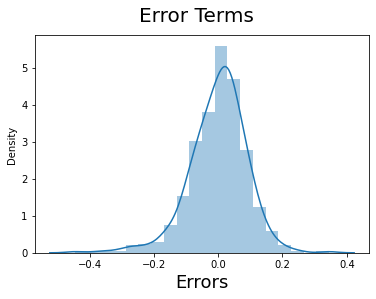

In [48]:
# Plot the histogram of the error terms.

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)      
plt.show()

**Inference:**
Errors are normally distributed with mean zero.
Value of zero means model is a perfect fit.

**9: Making Predictions Using the Final Model**

In [49]:
# Applying the scaling on test data.

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light_snowrain,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# Diving into X_test and Y_test.

y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
# Making predictions using the final model

X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr2.predict(X_test_new)

**10: Model Evaluation**

Text(0, 0.5, 'y_pred')

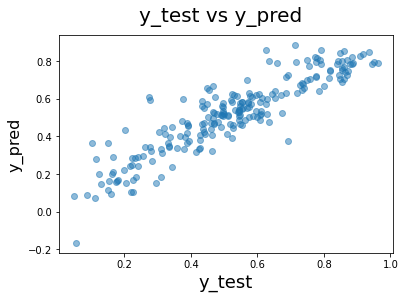

In [52]:
# Plot the graph for actual versus predicted values.

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)             
plt.ylabel('y_pred', fontsize = 16)     

***Inference: ***

Error term does not vary much as the value of the predictor variable changes.



**11. R square and Adjusted R square comparison:**

In [53]:
# R square score

from sklearn.metrics import r2_score

In [55]:
r2_1 = round(r2_score(y_train, y_pred = y_train_pred),3)
r2_1

0.839

In [56]:
r2_2 = round(r2_score(y_test, y_pred = y_test_pred),3)
r2_2

0.814

In [57]:
# Adjusted R square score.
# n is number of rows in test dataset

n = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1

p = X_train.shape[1]

# We find the Adjusted R-squared using the formula

Adjusted_r2_1 = round(1-(1-r2_1)*(n-1)/(n-p-1),3)
Adjusted_r2_1

0.83

In [58]:
# n is number of rows in test dataset

n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1

p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

Adjusted_r2_2 = round(1-(1-r2_2)*(n-1)/(n-p-1),3)
Adjusted_r2_2

0.787


**Inference:**



*   Train R sqaure = 0.839, Train Adjusted R square = 0.83
*   Test R square = 0.814, Test Adjusted R square = 0.787
This is a good comparison, hence we can see our model is performing good.

**Final Outcome:**


*   During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.
* Company should focus on expanding business during Spring.
* Temp and count is highly corelated.
* High temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.
* There is a less booking during Light Snow or Rain.
* Demand for 2019 has grown, which is good.
* Demands are high during clear weathersit.

**Conclusion**

**1.** Significant variables to predict the demand for shared bikes. 
Top 5 variables are:

* Year - 2019
* Holiday
* Temperature
* Windspeed
* Season

**2.** How well these variables describe the bike demands?

* Year - Coefficient value of ‘0.2345' indicated that a unit increase in yr variable, that means year wise rental numbers are increasing.
* Holiday - On holiday demand is low.
* Temperature - Coefficient value of ‘0.4387’ indicated that a unit increase in temp variable, means a temperature has significant impact on bike rentals.
* Windspeed -  A coefficient value of ‘-0.1585’ indicated that, a unit increase in windspeed variable decreases the bike hire.
* Season - Rental bikes demands are high in fall season. 
